In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\AFNAN AFSHEEN\\OneDrive\\Desktop\\covid\\covid_19_clean_complete.csv")

In [3]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,3/23/20,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,3/23/20,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,3/23/20,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,3/23/20,0.0,0.0,0.0


In [4]:
df=df.drop(columns=['Lat','Long']) # Dropping Unwanted Columns

In [5]:
df

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,1/22/20,2.0,0.0,0.0
1,NaN,Japan,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,1/22/20,0.0,0.0,0.0
...,...,...,...,...,...,...
19215,NaN,Jersey,3/23/20,0.0,0.0,0.0
19216,NaN,Puerto Rico,3/23/20,0.0,1.0,0.0
19217,NaN,Republic of the Congo,3/23/20,0.0,0.0,0.0
19218,NaN,The Bahamas,3/23/20,0.0,0.0,0.0


In [6]:
df=df.rename(columns={'Province/State':'State','Country/Region':'Country'})

In [7]:
df.Country.unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [8]:
df.State.value_counts()

Grand Princess      124
Diamond Princess    124
British Columbia     62
Minnesota            62
Virgin Islands       62
                   ... 
Florida              62
Oregon               62
Zhejiang             62
Ningxia              62
Netherlands          62
Name: State, Length: 134, dtype: int64

In [9]:
df["Active"]=df["Confirmed"]-df["Deaths"]-df["Recovered"]

In [10]:
df

,State,Country,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,1/22/20,2.0,0.0,0.0,2.0
1,NaN,Japan,1/22/20,2.0,0.0,0.0,2.0
2,NaN,Singapore,1/22/20,0.0,0.0,0.0,0.0
3,NaN,Nepal,1/22/20,0.0,0.0,0.0,0.0
4,NaN,Malaysia,1/22/20,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
19215,NaN,Jersey,3/23/20,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,3/23/20,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,3/23/20,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,3/23/20,0.0,0.0,0.0,0.0


In [11]:
df_grouped=df.groupby("Date")["Active","Deaths","Recovered"].sum().reset_index()

<ipython-input-11-a92203df7271>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped=df.groupby("Date")["Active","Deaths","Recovered"].sum().reset_index()


In [12]:
df_grouped

,Date,Active,Deaths,Recovered
0,02-01-2020,11487.0,259.0,284.0
1,02-02-2020,15945.0,362.0,472.0
2,02-03-2020,18821.0,426.0,623.0
3,02-04-2020,22537.0,492.0,852.0
4,02-05-2020,25936.0,564.0,1124.0
...,...,...,...,...
57,3/19/20,147987.0,9867.0,84854.0
58,3/20/20,173611.0,11299.0,87256.0
59,3/21/20,200052.0,12973.0,91499.0
60,3/22/20,223619.0,14632.0,97704.0


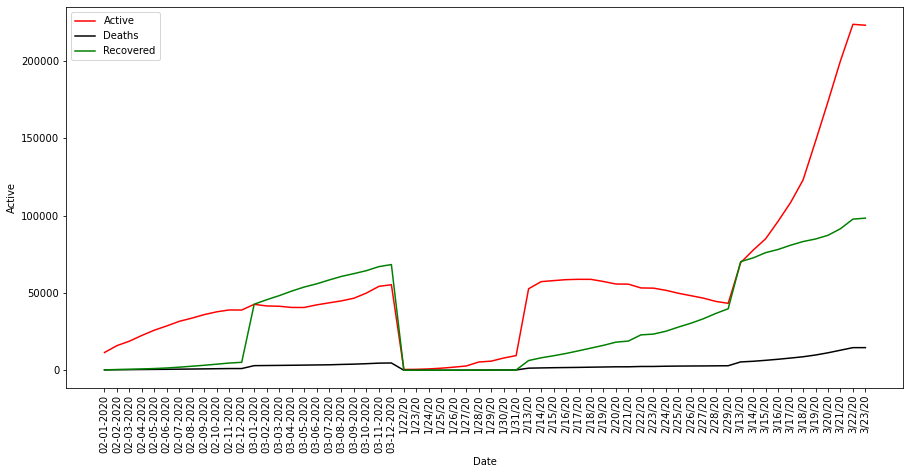

In [13]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df_grouped.Date, y=df_grouped.Active,color="Red")
sns.lineplot(x=df_grouped.Date, y=df_grouped.Deaths,color="Black")
sns.lineplot(x=df_grouped.Date, y=df_grouped.Recovered,color="Green")
plt.legend(labels=['Active', 'Deaths', 'Recovered'])
plt.xticks(rotation=90)
plt.show()

In [14]:
Cases=df.groupby('Country')['Active'].sum().sort_values(ascending=False).head(20).reset_index()

Text(0.5, 0, 'Count in Millon')

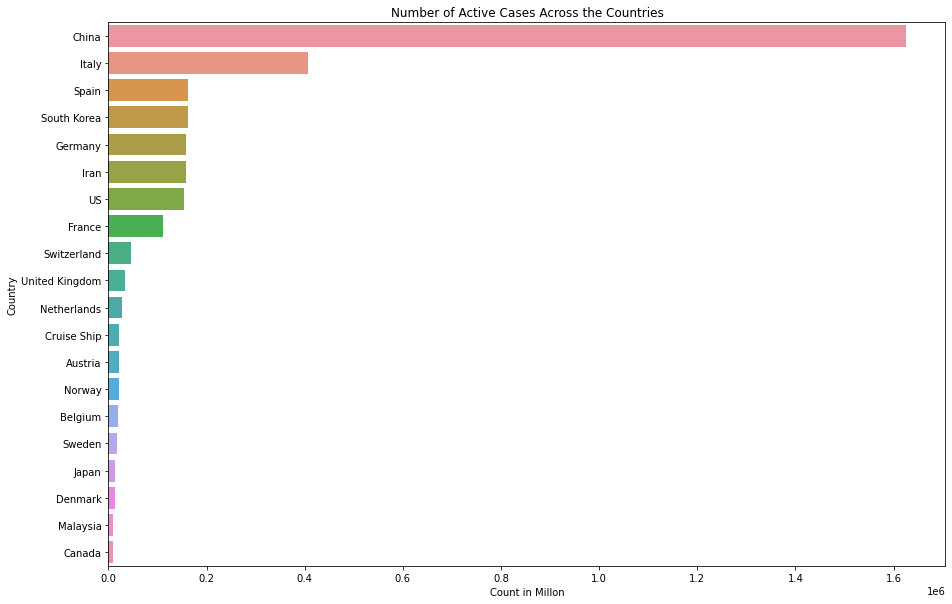

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x=Cases.Active,y=Cases.Country)
plt.title("Number of Active Cases Across the Countries")
plt.xlabel("Count in Millon")

In [16]:
Death_cases=df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(20).reset_index()

Text(0.5, 1.0, 'Number of Deaths Cases Across the Countries')

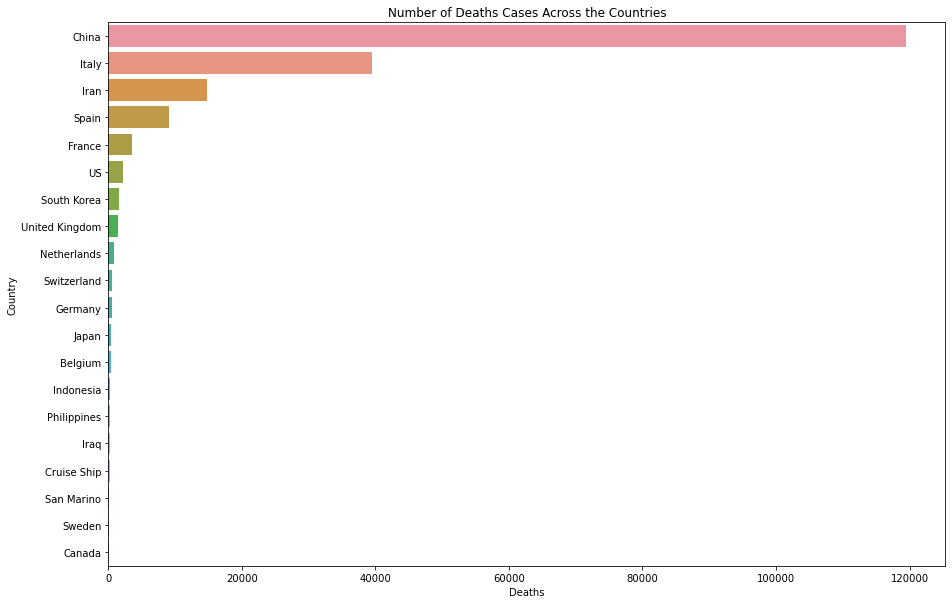

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x=Death_cases.Deaths,y=Death_cases.Country)
plt.title("Number of Deaths Cases Across the Countries")

In [18]:
Top_Death_Countries=Death_cases.head(4)
top_active_countries=Cases.head(4)

In [19]:
China_Details=(df.loc[df.Country == 'China'])

In [20]:
Italy_Details=df.loc[df.Country == 'Italy']

In [21]:
Iran_Details=df.loc[df.Country == 'Iran']

In [22]:
Spain_Details=df.loc[df.Country == 'Spain']

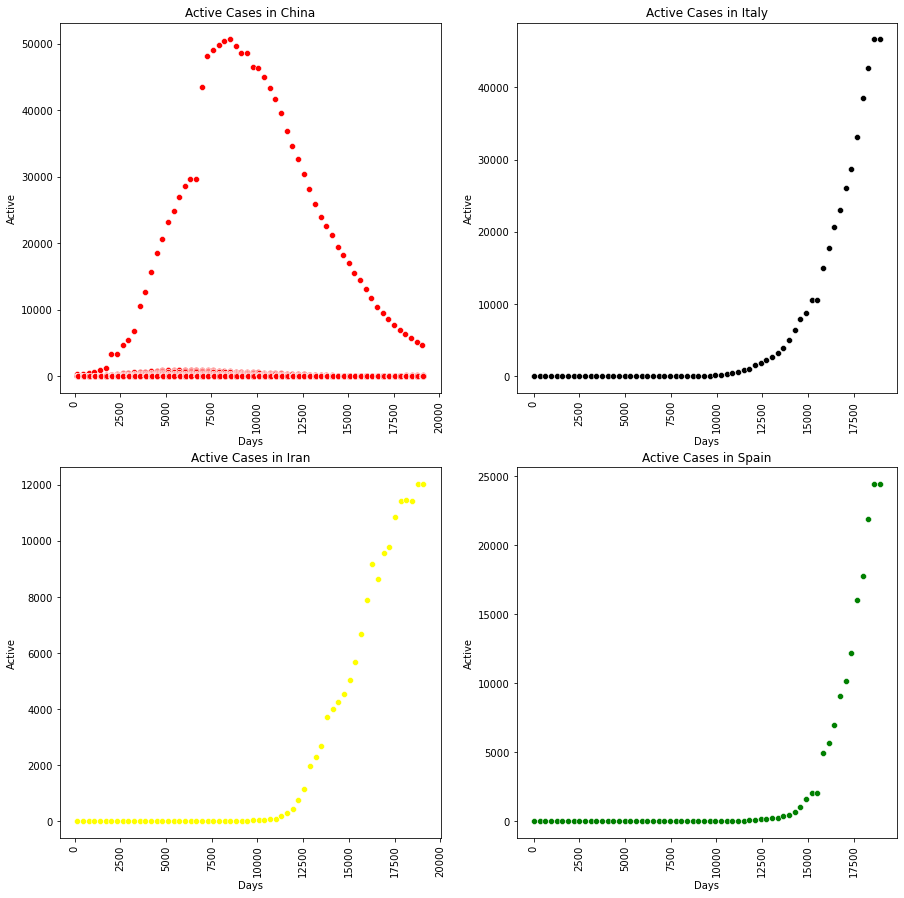

In [23]:
plt.figure(figsize=(15,15))
plt.title("Active Cases in Top Countries")
plt.subplot(2,2,1)
sns.scatterplot(x=China_Details.index,y=China_Details.Active,data=China_Details,color="red")
plt.xticks(rotation=90)
plt.title("Active Cases in China")
plt.xlabel("Days")
plt.subplot(2,2,2)
sns.scatterplot(x=Italy_Details.index,y=Italy_Details.Active,data=Italy_Details,color='black')
plt.xticks(rotation=90)
plt.title("Active Cases in Italy")
plt.xlabel("Days")
plt.subplot(2,2,3)
sns.scatterplot(x=Iran_Details.index,y=Iran_Details.Active,data=Iran_Details,color='yellow')
plt.xticks(rotation=90)
plt.title("Active Cases in Iran")
plt.xlabel("Days")
plt.subplot(2,2,4)
sns.scatterplot(x=Spain_Details.index,y=Spain_Details.Active,data=Spain_Details,color='green')
plt.xticks(rotation=90)
plt.title("Active Cases in Spain")
plt.xlabel("Days")
plt.show()

In [24]:
df_india=pd.read_excel("C:\\Users\\AFNAN AFSHEEN\\OneDrive\\Desktop\\covid\\covid_19_india.xlsx")

In [25]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [26]:
df_india=df_india.drop(columns=["S. No."])

In [27]:
df_india["Confirmed_Cases"]=df_india["Total Confirmed cases (Indian National)"]+df_india["Total Confirmed cases ( Foreign National )"]

In [28]:
df_india

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Confirmed_Cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [29]:
df_india=df_india.drop(columns=["Total Confirmed cases (Indian National)","Total Confirmed cases ( Foreign National )"])

In [30]:
df_india

,Name of State / UT,Cured,Death,Confirmed_Cases
0,Andhra Pradesh,0,0,9
1,Bihar,0,1,3
2,Chhattisgarh,0,0,1
3,Delhi,6,1,31
4,Gujarat,0,1,33
5,Haryana,11,0,28
6,Himachal Pradesh,0,1,3
7,Karnataka,3,1,41
8,Kerala,4,0,109
9,Madhya Pradesh,0,0,9


In [31]:
df_india["Active_Cases"]=df_india["Confirmed_Cases"]-df_india["Death"]-df_india["Cured"]

In [32]:
df_india=df_india.rename(columns={"Name of State / UT":"State"})

In [33]:
df_india_active=df_india.groupby("State")["Active_Cases"].sum().sort_values(ascending=False).reset_index()
df_india_Death=df_india.groupby("State")["Death"].sum().sort_values(ascending=False).reset_index()

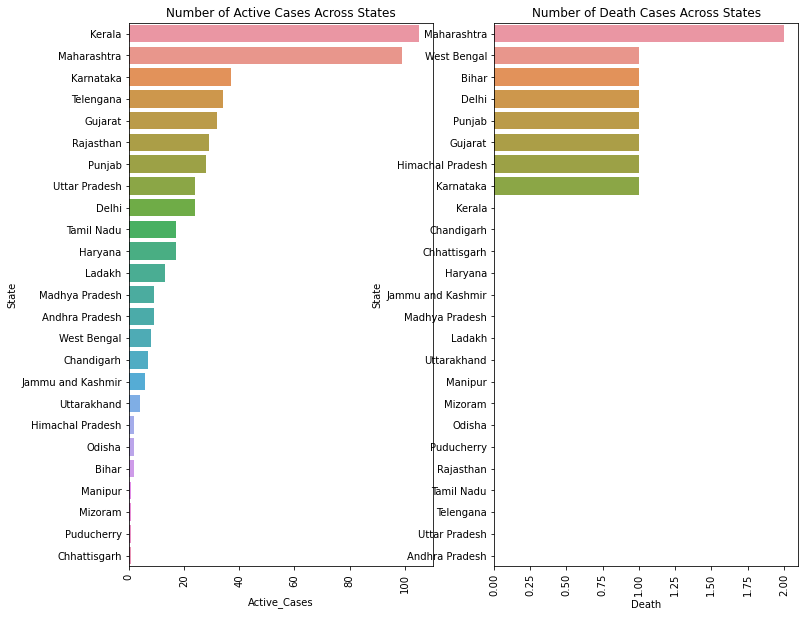

In [34]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.barplot(y=df_india_active.State,x=df_india_active.Active_Cases)
plt.xticks(rotation=90)
plt.title("Number of Active Cases Across States")
plt.subplot(1,2,2)
sns.barplot(y=df_india_Death.State,x=df_india_Death.Death)
plt.xticks(rotation=90)
plt.title("Number of Death Cases Across States")
plt.show()

In [35]:
df_india.columns

Index(['State', 'Cured', 'Death', 'Confirmed_Cases', 'Active_Cases'], dtype='object')

C:\Users\AFNAN AFSHEEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AFNAN AFSHEEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AFNAN AFSHEEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

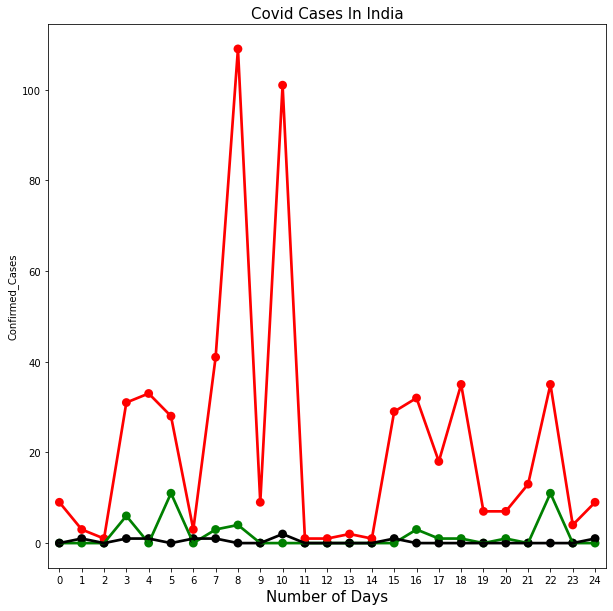

In [36]:
plt.figure(figsize=(10,10))
sns.pointplot(df_india.index,df_india.Cured,color="green")
sns.pointplot(df_india.index,df_india.Death,color="black")
sns.pointplot(df_india.index,df_india.Confirmed_Cases,color="red")
plt.title("Covid Cases In India",fontsize=15)
plt.xlabel("Number of Days",fontsize=15)
plt.show()
